In [2]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread, imsave
from skimage.morphology import  opening, closing, dilation, erosion, disk, square, octagon
from skimage.morphology.binary import binary_opening, binary_closing
from skimage.color import rgba2rgb, rgb2gray, gray2rgb, rgb2hsv
from skimage.filters import difference_of_gaussians, threshold_otsu, try_all_threshold

In [3]:
BORDER_SIZE = 30

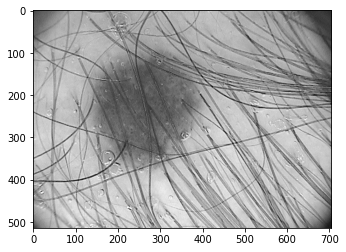

In [4]:
original = imread('ph2-dataset/IMD003.bmp')
original = original[BORDER_SIZE:-BORDER_SIZE, BORDER_SIZE:-BORDER_SIZE, :]
gray = rgb2gray(original)
plt.imshow(gray,cmap='gray')
plt.show()

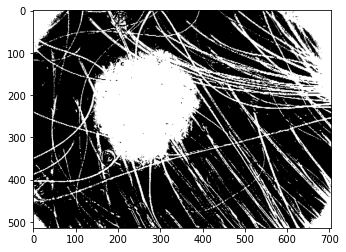

In [5]:
binary = gray.copy()
THRESH = threshold_otsu(binary)
binary = np.where(binary > THRESH, 0, 1)
plt.imshow(binary, cmap='gray')
plt.show()

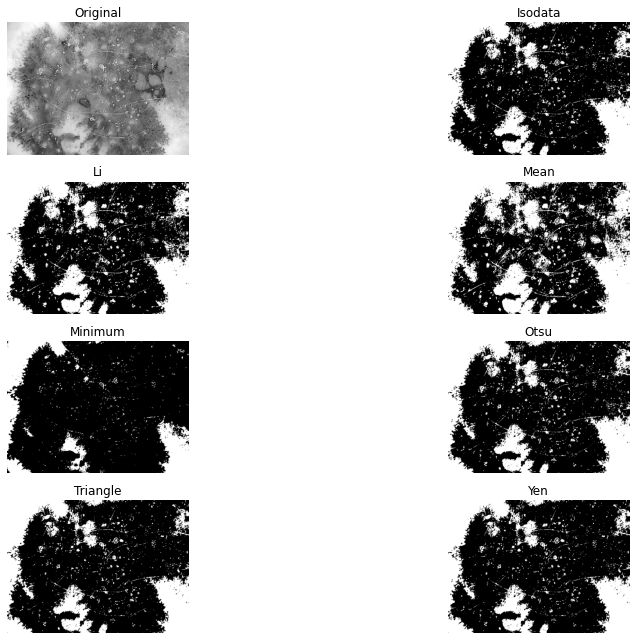

In [36]:
fig, ax = try_all_threshold(gray, figsize=(16, 9), verbose=False)

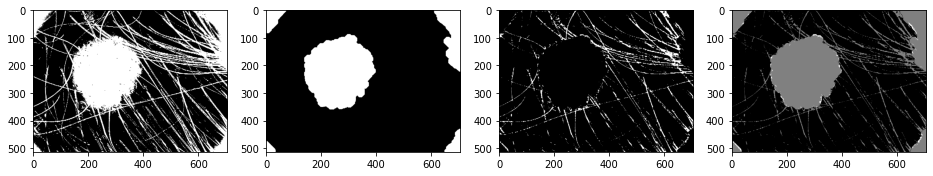

In [6]:
n = 15
el = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        if i == j or i == n-1-j:
            el[i,j] = 1
el = octagon(6,5)
op = binary_opening(binary, selem=el)
op = dilation(op, selem=el)

diff = np.abs(binary - op)
op_diff = erosion(diff, disk(1))

fig, axs  = plt.subplots(1,4, figsize=(16, 9))
axs = axs.ravel()
axs[0].imshow(binary, cmap='gray')
axs[1].imshow(op, cmap='gray')
axs[2].imshow(op_diff, cmap='gray')
axs[3].imshow(op_diff + op, cmap='gray')
plt.show()

In [7]:
from skimage.filters.edges import convolve

0


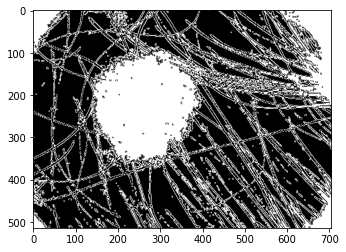

In [8]:
k = np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]])
r = convolve(binary, k, mode='constant', cval=0.0)
print(threshold_otsu(np.abs(r)))
t = np.where(np.abs(r) > threshold_otsu(np.abs(r)), 1, 0)
plt.imshow(np.abs(binary_closing(t) - binary), cmap='gray')